In [17]:
# import matplotlib.pyplot as plt
import numpy as np

In [18]:
cg_mean, cg_std = np.loadtxt('./results/beta_optimization').T
g_mean, g_std = np.loadtxt('./results/beta_optimization_gd.csv').T
betas = np.linspace(0, 2, 50)

In [19]:
plt.plot(betas, cg_mean, color='gray', label = 'Conjugate Gradient Descent')
plt.fill_between(betas, cg_mean - cg_std, cg_mean + cg_std, color='gray', alpha=0.2)
plt.plot(betas, g_mean, color='red', label = 'Gradient Descent')
plt.fill_between(betas, g_mean - g_std, g_mean + g_std, color='red', alpha=0.2)
plt.xlabel(r'$\beta$', fontsize=14)
plt.ylabel('Correlation', fontsize=14)
plt.legend()
plt.tick_params(axis='both', which='major', direction='inout', length = 10, width = 1.5, labelsize='14')

NameError: name 'plt' is not defined

In [ ]:
betas

array([0.        , 0.04081633, 0.08163265, 0.12244898, 0.16326531,
       0.20408163, 0.24489796, 0.28571429, 0.32653061, 0.36734694,
       0.40816327, 0.44897959, 0.48979592, 0.53061224, 0.57142857,
       0.6122449 , 0.65306122, 0.69387755, 0.73469388, 0.7755102 ,
       0.81632653, 0.85714286, 0.89795918, 0.93877551, 0.97959184,
       1.02040816, 1.06122449, 1.10204082, 1.14285714, 1.18367347,
       1.2244898 , 1.26530612, 1.30612245, 1.34693878, 1.3877551 ,
       1.42857143, 1.46938776, 1.51020408, 1.55102041, 1.59183673,
       1.63265306, 1.67346939, 1.71428571, 1.75510204, 1.79591837,
       1.83673469, 1.87755102, 1.91836735, 1.95918367, 2.        ])

In [ ]:
a = np.random.uniform(0, 1, size=(196, 0))

In [ ]:
import nilearn
import numpy as np
from nilearn import datasets, plotting
from sklearn.feature_selection import SelectPercentile, f_classif

In [ ]:
aal = datasets.fetch_atlas_aal()


In [ ]:
len(aal.labels)

116

In [11]:
def top_pairs(scores, coordinates, n_rois = 116, k = 5):
    idx = np.argsort(scores)[-k:]
    rois = set() 
    rois_scores = {}
    for i in idx:
        rois.add(i//n_rois)
        rois.add(i%n_rois)
        rois_scores[i//n_rois] = scores[i]
        rois_scores[i%n_rois] = scores[i]
    rois = list(rois)
    coordinates = coordinates[rois]
    scores = scores.reshape(n_rois, n_rois)[rois][:, rois]
    return coordinates, scores, rois_scores

### Loading connectivity matrices 

In [44]:
ising_rep = np.load('../data/gd_all.npy')
fc_rep_ut = np.load('../data/sfc.npy')
fc_rep_mat = np.zeros((841, 116, 116))
fc_rep = np.zeros((841, 116*116))
for i in range(fc_rep_ut.shape[0]):
    fc_rep_mat[i][np.triu_indices(116)] = fc_rep_ut[i]
    fc_rep_mat[i] = np.triu(fc_rep_mat[i]) + np.tril(fc_rep_mat[i].T, k=-1)
    fc_rep[i] = fc_rep_mat[i].flatten()
print(ising_rep.shape, fc_rep.shape)
diag = np.load('../data/diag_all.npy')
fs = SelectPercentile(f_classif, percentile=10)
ising_rep = fs.fit_transform(ising_rep, diag)
ising_scores = fs.scores_
fc_rep = fs.fit_transform(fc_rep, diag)
fc_scores = fs.scores_

(841, 13456) (841, 13456)


In [45]:
coordinates = plotting.find_parcellation_cut_coords(aal['maps'])

/home/shivansh/miniconda3/envs/neuro/lib/python3.8/site-packages/nilearn/plotting/displays/_projectors.py:166: UserWarning: 'adjacency_matrix' is not symmetric. A directed graph will be plotted.
  warnings.warn(("'adjacency_matrix' is not symmetric. "


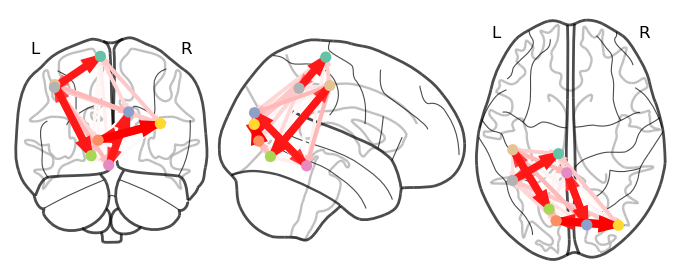

In [46]:
is_coords, is_scores, is_rois = top_pairs(ising_scores, coordinates, k=5)
plotting.plot_connectome(is_scores, is_coords)

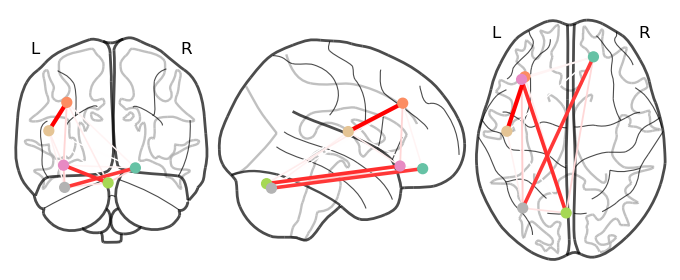

In [51]:
fc_coords, f_scores, fc_rois = top_pairs(fc_scores, coordinates, k=5)
plotting.plot_connectome(f_scores, fc_coords)

In [52]:
labels = [(aal.labels[i], fc_rois[i]) for i in fc_rois]
labels

[('Frontal_Sup_Orb_R', 36.07735545427141),
 ('Cerebelum_Crus1_L', 36.07735545427141),
 ('Vermis_7', 37.98146452010402),
 ('Frontal_Inf_Orb_L', 37.98146452010402),
 ('Frontal_Mid_L', 46.401333426722246),
 ('Rolandic_Oper_L', 46.401333426722246)]

In [53]:
labels = [(aal.labels[i], is_rois[i]) for i in is_rois]
labels

[('Vermis_3', 16.01626255510945),
 ('Cuneus_R', 16.01626255510945),
 ('Parietal_Inf_L', 16.208868866706624),
 ('Paracentral_Lobule_L', 16.208868866706624),
 ('Postcentral_L', 16.294879978747908),
 ('Lingual_L', 16.294879978747908),
 ('Occipital_Mid_R', 17.941764124924827),
 ('Calcarine_L', 17.941764124924827)]